In [7]:
#importing product dataset
import pandas as pd


product_data = pd.read_csv("Product Data Set - Student 2 of 3.csv", sep = '|') 
product_data.head()
#product_data

PRODUCT CODE PRODUCT CATEGORY UNIT LIST PRICE
0         30001  HEALTH & BEAUTY          $7.45 
1         30002  HEALTH & BEAUTY          $5.35 
2         30003  HEALTH & BEAUTY          $5.49 
3         30004  HEALTH & BEAUTY          $6.46 
4         30005  HEALTH & BEAUTY          $7.33

In [9]:
#importing transaction dataset
import pandas as pd

transaction_data = pd.read_csv("Transaction Data Set - Student 3 of 3.csv", sep  = '|')
transaction_data.head()

CUSTOMER NUM  PRODUCT NUM  QUANTITY PURCHASED  DISCOUNT TAKEN  \
0         10114        30011                   4             0.0   
1         10217        30016                   3             0.0   
2         10224        30013                   4             0.0   
3         10103        30012                   3             0.2   
4         10037        30010                   8             0.0   

  TRANSACTION DATE  STOCKOUT  
0         1/2/2015         0  
1         1/2/2015         0  
2         1/2/2015         0  
3         1/2/2015         0  
4         1/2/2015         0

In [14]:
#importing customer dataset
import pandas as pd

customer_data = pd.read_csv("Customer Data Set - Student 1 of 3.csv")
customer_data.head()

CUSTOMERID  GENDER  AGE    INCOME  EXPERIENCE SCORE LOYALTY GROUP  \
0       10001       0   64  $133,498                 5      enrolled   
1       10002       0   42   $94,475                 9   notenrolled   
2       10003       0   40   $88,610                 9      enrolled   
3       10004       0   38   $84,313                 8      enrolled   
4       10005       0   30   $51,498                 3   notenrolled   

  ENROLLMENT DATE  HOUSEHOLD SIZE MARITAL STATUS  
0      06-03-2013               4         Single  
1             NaN               6        Married  
2      02-09-2010               5        Married  
3      06-04-2015               1         Single  
4             NaN               1         Single

In [20]:
#data exploration
product_data.shape

(30, 3)

In [21]:
transaction_data.shape


(10000, 6)

In [22]:
customer_data.shape

(500, 9)

In [23]:
#types and shit
type(product_data)

pandas.core.frame.DataFrame

In [24]:
type(transaction_data)

pandas.core.frame.DataFrame

In [25]:
type(customer_data)

pandas.core.frame.DataFrame

In [28]:
type(customer_data.AGE)

pandas.core.series.Series

In [61]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [62]:
transaction_data.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object

In [64]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))
customer_data['INCOME']= customer_data['INCOME'].map(lambda x : int(x.replace(',', '')))
customer_data.head()

In [67]:
customer_data["INCOME"].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [68]:
customer_data["MARITAL STATUS"].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [69]:
customer_data["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [80]:
#converting 'enrollment date' to a datetime object
from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y') )

In [81]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

In [85]:
print(customer_data.isnull().values.any())
print(transaction_data.isnull().values.any())
print(product_data.isnull().values.any())

True
False
False


In [89]:
print(customer_data.columns[customer_data.isna().any()].tolist())
print(customer_data.columns[customer_data.isnull().any()].tolist())


['ENROLLMENT DATE']
['ENROLLMENT DATE']


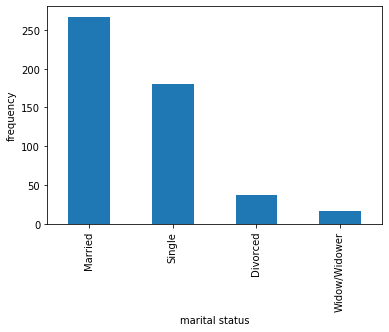

In [97]:
#visualisation/graphs
import matplotlib.pyplot as plt

customer_data["MARITAL STATUS"].value_counts().plot(kind='bar')
plt.xlabel('marital status')
plt.ylabel('frequency')
plt.show()


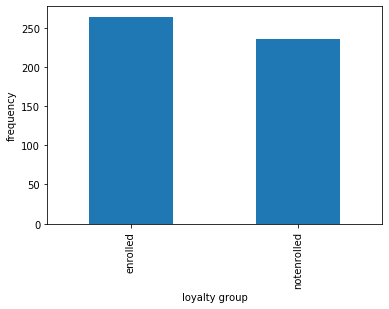

In [99]:
customer_data["LOYALTY GROUP"].value_counts().plot(kind='bar')
plt.xlabel('loyalty group')
plt.ylabel('frequency')
plt.show()

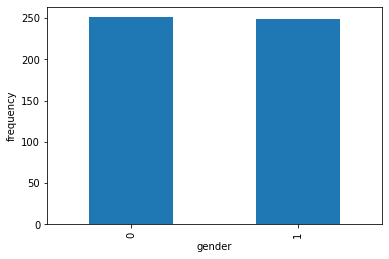

In [100]:
customer_data["GENDER"].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('frequency')
plt.show()

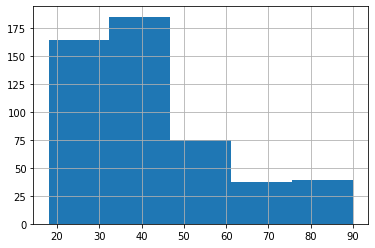

In [102]:
customer_data["AGE"].hist(bins = 5)
plt.show()

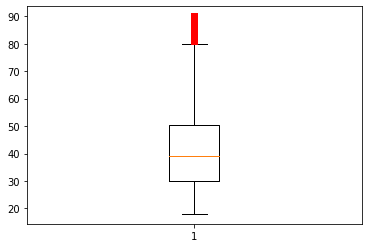

In [103]:
#plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
#plt.grid(linestyle='-',linewidth=1)
plt.show()

In [106]:
customer_data["AGE"].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

In [107]:
trans_product = transaction_data.merge(product_data, how = 'inner', left_on ='PRODUCT NUM', right_on = 'PRODUCT CODE')
trans_product.head()

CUSTOMER NUM  PRODUCT NUM  QUANTITY PURCHASED  DISCOUNT TAKEN  \
0         10114        30011                   4             0.0   
1         10086        30011                   6             0.0   
2         10174        30011                  10             0.0   
3         10401        30011                  12             0.0   
4         10216        30011                  12             0.1   

  TRANSACTION DATE  STOCKOUT  PRODUCT CODE PRODUCT CATEGORY UNIT LIST PRICE  
0         1/2/2015         0         30011          APPAREL         $25.46   
1         1/2/2015         0         30011          APPAREL         $25.46   
2         1/2/2015         0         30011          APPAREL         $25.46   
3         1/2/2015         0         30011          APPAREL         $25.46   
4         1/2/2015         0         30011          APPAREL         $25.46

In [109]:
print(product_data["PRODUCT CODE"].head())
print(transaction_data["PRODUCT NUM"].head())

0    30001
1    30002
2    30003
3    30004
4    30005
Name: PRODUCT CODE, dtype: int64
0    30011
1    30016
2    30013
3    30012
4    30010
Name: PRODUCT NUM, dtype: int64


In [116]:
trans_product["UNIT LIST PRICE"] =trans_product["UNIT LIST PRICE"].map(lambda x: float(x.replace('$','')))

In [118]:
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [123]:
trans_product["TOTAL_PRICE"] = trans_product["QUANTITY PURCHASED"] *trans_product["UNIT LIST PRICE"] *(1 - trans_product["DISCOUNT TAKEN"])
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
TOTAL_PRICE           float64
dtype: object

In [124]:
trans_product.head()

CUSTOMER NUM  PRODUCT NUM  QUANTITY PURCHASED  DISCOUNT TAKEN  \
0         10114        30011                   4             0.0   
1         10086        30011                   6             0.0   
2         10174        30011                  10             0.0   
3         10401        30011                  12             0.0   
4         10216        30011                  12             0.1   

  TRANSACTION DATE  STOCKOUT  PRODUCT CODE PRODUCT CATEGORY  UNIT LIST PRICE  \
0         1/2/2015         0         30011          APPAREL            25.46   
1         1/2/2015         0         30011          APPAREL            25.46   
2         1/2/2015         0         30011          APPAREL            25.46   
3         1/2/2015         0         30011          APPAREL            25.46   
4         1/2/2015         0         30011          APPAREL            25.46   

   TOTAL_PRICE  
0      101.840  
1      152.760  
2      254.600  
3      305.520  
4      274.968

In [125]:
trans_product["PRODUCT CATEGORY"].unique()

array(['APPAREL', 'ELECTRONICS', 'FOOD', 'HEALTH & BEAUTY'], dtype=object)

In [159]:
customer_category_sum = trans_product.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({'TOTAL_PRICE':'sum'})
customer_category_sum.head()


TOTAL_PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [160]:
customer_category_sum.columns

Index(['TOTAL_PRICE'], dtype='object')

In [138]:
customer_category_sum = customer_category_sum.reset_index().head()

In [161]:
Income_by_product = trans_product.groupby('PRODUCT CATEGORY').agg({'TOTAL_PRICE':'sum'}).sort_values('TOTAL_PRICE',ascending=False)
Revenue_by_product=Income_by_product.rename(columns={'TOTAL_PRICE':'Revenue Per Product'})
Income_by_product

TOTAL_PRICE
PRODUCT CATEGORY             
ELECTRONICS       1607192.422
APPAREL            936757.914
FOOD                96044.610
HEALTH & BEAUTY     54776.312

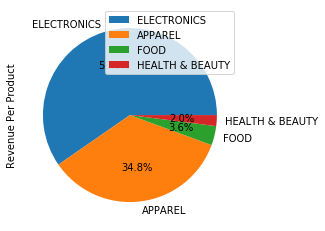

In [168]:
Revenue_by_product['Revenue Per Product'].plot(kind='pie',autopct='%1.1f%%',legend = True)

In [169]:
customer_pivot = customer_category_sum.pivot(index= 'CUSTOMER NUM', columns='PRODUCT CATEGORY', values='TOTAL_PRICE')
customer_pivot

In [182]:
from datetime import datetime
trans_product['TRANSACTION DATE']=trans_product['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

In [179]:
print(trans_product.isnull().values.any())


False


In [181]:
trans_product.dtypes

CUSTOMER NUM                   int64
PRODUCT NUM                    int64
QUANTITY PURCHASED             int64
DISCOUNT TAKEN               float64
TRANSACTION DATE      datetime64[ns]
STOCKOUT                       int64
PRODUCT CODE                   int64
PRODUCT CATEGORY              object
UNIT LIST PRICE              float64
TOTAL_PRICE                  float64
dtype: object

In [197]:
dates_impact = trans_product.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE':'max', 'TOTAL_PRICE':'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT DATE', 'TOTAL_PRICE':'TOTAL SPENT'})
dates_impact.head()

RECENT DATE  TOTAL SPENT
CUSTOMER NUM                         
10001         2015-12-24     6826.770
10002         2015-12-21     5062.451
10003         2015-12-31     8562.440
10004         2015-12-17     5522.694
10005         2015-12-22      213.512

In [189]:
customer_KPI = customer_pivot.merge(dates_impact, how='inner', left_index=True, right_index=True)
customer_KPI.head()

APPAREL  ELECTRONICS    FOOD  HEALTH & BEAUTY RECENT DATE  \
CUSTOMER NUM                                                               
10001         4022.430     1601.315  68.688         1134.337  2015-12-24   
10002         2312.509          NaN     NaN              NaN  2015-12-21   

              TOTAL SPENT  
CUSTOMER NUM               
10001            6826.770  
10002            5062.451

In [192]:
customer_KPI = customer_KPI.fillna(0)
customer_KPI

APPAREL  ELECTRONICS    FOOD  HEALTH & BEAUTY RECENT DATE  \
CUSTOMER NUM                                                               
10001         4022.430     1601.315  68.688         1134.337  2015-12-24   
10002         2312.509        0.000   0.000            0.000  2015-12-21   

              TOTAL SPENT  
CUSTOMER NUM               
10001            6826.770  
10002            5062.451

In [195]:
all_view = customer_data.merge(customer_KPI, how='inner', left_on='CUSTOMERID', right_index = True)
all_view

CUSTOMERID  GENDER  AGE  INCOME  EXPERIENCE SCORE LOYALTY GROUP  \
0       10001       0   64  133498                 5      enrolled   
1       10002       0   42   94475                 9   notenrolled   

  ENROLLMENT DATE  HOUSEHOLD SIZE MARITAL STATUS   APPAREL  ELECTRONICS  \
0      2013-03-06               4         Single  4022.430     1601.315   
1             NaT               6        Married  2312.509        0.000   

     FOOD  HEALTH & BEAUTY RECENT DATE  TOTAL SPENT  
0  68.688         1134.337  2015-12-24     6826.770  
1   0.000            0.000  2015-12-21     5062.451

In [201]:
#bivariate analysis
tab1 = pd.crosstab(all_view['GENDER'], all_view['LOYALTY GROUP'])
tab1

LOYALTY GROUP  enrolled  notenrolled
GENDER                              
0                     1            1

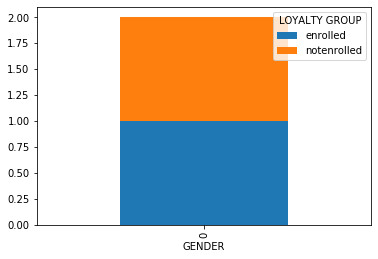

In [202]:
tab1.plot(kind='bar', stacked=True)
plt.show()

LOYALTY GROUP     enrolled  notenrolled
EXPERIENCE SCORE                       
5                        1            0
9                        0            1


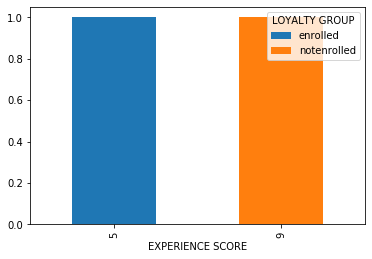

In [205]:
tab2 = pd.crosstab(all_view['EXPERIENCE SCORE'], all_view['LOYALTY GROUP'])
print(tab2)
tab2.plot(kind='bar', stacked=True)
plt.show()

LOYALTY GROUP   enrolled  notenrolled
MARITAL STATUS                       
Married                0            1
Single                 1            0


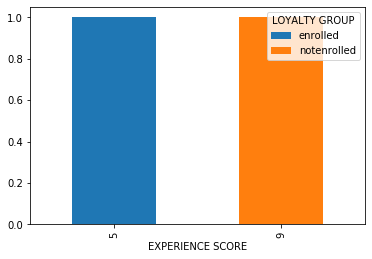

In [206]:
tab3 = pd.crosstab(all_view['MARITAL STATUS'], all_view['LOYALTY GROUP'])
print(tab3)
tab2.plot(kind='bar', stacked=True)
plt.show()

LOYALTY GROUP   enrolled  notenrolled
MARITAL STATUS                       
Married                0            1
Single                 1            0


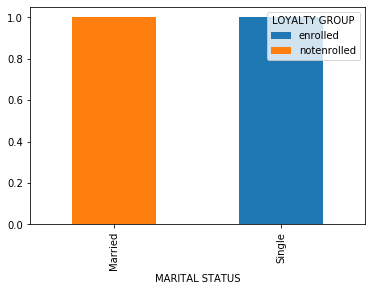

In [207]:
tab4 = pd.crosstab(customer_data['MARITAL STATUS'], all_view['LOYALTY GROUP'])
print(tab3)
tab4.plot(kind='bar', stacked=True)
plt.show()

LOYALTY GROUP   enrolled  notenrolled
MARITAL STATUS                       
Married                0            1
Single                 1            0


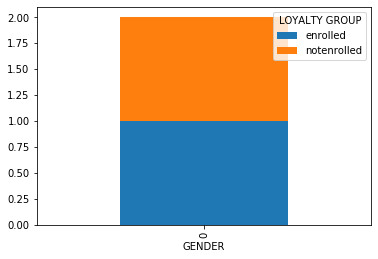

In [208]:
tab5 = pd.crosstab(customer_data['GENDER'], all_view['LOYALTY GROUP'])
print(tab3)
tab5.plot(kind='bar', stacked=True)
plt.show()

In [209]:
all_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

AGE
LOYALTY GROUP     
enrolled        64
notenrolled     42

In [213]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=all_view['AGE'][all_view['LOYALTY GROUP'] == "enrolled"]
plot2=all_view['AGE'][all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()

In [215]:
all_view['TOTAL SPENT BINNED'] = pd.cut(all_view['TOTAL SPENT'],10) # 10 bins of age

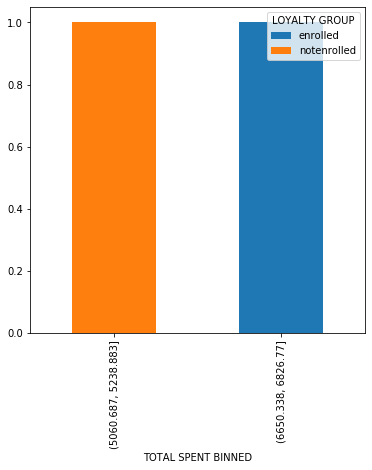

In [216]:
table=pd.crosstab(all_view['TOTAL SPENT BINNED'],all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

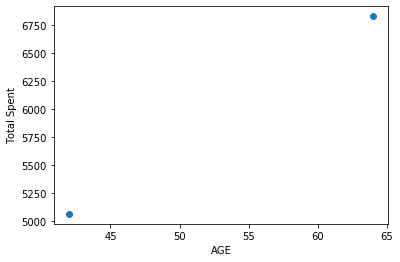

In [218]:
plt.scatter(all_view['AGE'],all_view['TOTAL SPENT'])
plt.xlabel("AGE")
plt.ylabel("Total Spent")
plt.show()

In [219]:
from scipy.stats import pearsonr
pearsonr(all_view['AGE'],customer_all_view['TOTAL SPENT'])

NameError: name 'customer_all_view' is not defined

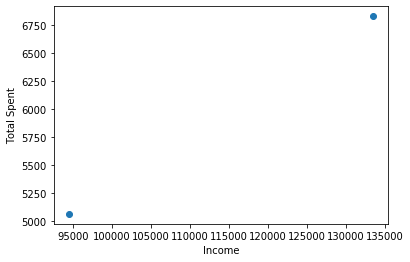

In [220]:
plt.scatter(all_view['INCOME'],all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

In [221]:
pearsonr(all_view['INCOME'],all_view['TOTAL SPENT'])

(1.0, 1.0)

In [222]:
table = all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

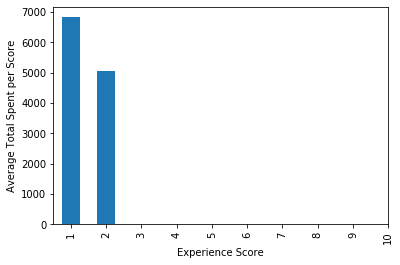

In [223]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()
